In [840]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.stats

In [841]:
with open('data/sim1_data_trial0.pkl','rb') as file:
    data = pickle.load(file)

In [842]:
font = {'family' : 'Helvetica Neue',
        'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)

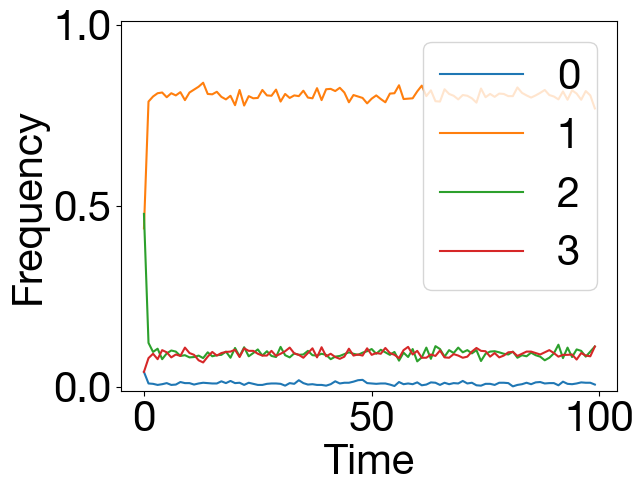

In [843]:
plt.plot(data['freq_timeseries'].T)
plt.ylim(-0.01,1.01)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend(np.arange(4))

In [844]:
data['freq_timeseries'][:,-1]

array([0.007, 0.769, 0.112, 0.112])